# 3. Exploratory Analysis

## Hypothesis

The content in the article can be used to predict an appropriate content tag. To avoid dealing with multiple outcome buckets for a single observation, I will use the article_subtopic field as the outcome bucket. This represents the article's primary tag. 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
Location = r'./clean_data.csv'
df = pd.read_csv(Location)

In [3]:
df.head()

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
0,If you're having trouble trying to be more inn...,2016-11-11T20:00:15+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Innovation, Personal Pr...",Planning for Growth,Heather Willems,The Power of Non-Linear ThinkingHeather Willem...,The Power of Non-Linear Thinking
1,Huge growth may be possible for businesses of ...,2016-11-09T22:30:34+00:00,Planning for Growth,Operations,"[Business Expansion, Business Plan, Cash Flow,...",Planning for Growth,Andrew J. Sherman,3 Growth Strategies for Businesses With Limite...,3 Growth Strategies for Businesses With Limite...
2,What sets your business apart from the competi...,2016-11-11T22:30:47+00:00,Getting Customers,Marketing & Sales,"[Advertising, Brainstorming, Branding, Busines...",Getting Customers,Rieva Lesonsky,USP 101: How to Uncover Your Unique Selling Pr...,USP 101: How to Uncover Your Unique Selling Pr...
3,"Organizational changes are rarely fun or easy,...",2016-11-03T23:30:02+00:00,Building Your Team,Company Culture,"[Building Your Team, Business Expansion, Busin...",Building Your Team,David Niu,8 Strategies for Big (or Small) Organizational...,8 Strategies for Big (or Small) Organizational...
4,"When expanding your business, exporting to int...",2016-10-27T19:00:39+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Importing & Exporting, ...",Planning for Growth,Greg Sandler,Lessons Learned: Four Stories From Experienced...,Lessons Learned: Four Stories From Experienced...


In [4]:
# spacy for pre-processing and traditional NLP
import spacy
from spacy.en import English

# Initializing the nlp_toolkit
nlp_toolkit = English()

In [6]:
content = unicode(df.loc[0]['content'], "utf-8")
parsed = nlp_toolkit(content)

for i, word in enumerate(parsed): 
    print "Word: {}".format(word)
    print "\t Phrase type: {}".format(word.dep_)
    print "\t Is the word a known entity type? {}".format(
        word.ent_type_  if word.ent_type_ else "No")
    print "\t Lemma: {}".format(word.lemma_)
    print "\t Parent of this word: {}".format(word.head.lemma_)

Word: The
	 Phrase type: det
	 Is the word a known entity type? No
	 Lemma: the
	 Parent of this word: power
Word: Power
	 Phrase type: npadvmod
	 Is the word a known entity type? No
	 Lemma: power
	 Parent of this word: call
Word: of
	 Phrase type: prep
	 Is the word a known entity type? No
	 Lemma: of
	 Parent of this word: power
Word: Non
	 Phrase type: compound
	 Is the word a known entity type? No
	 Lemma: non
	 Parent of this word: founder
Word: -
	 Phrase type: punct
	 Is the word a known entity type? No
	 Lemma: -
	 Parent of this word: founder
Word: Linear
	 Phrase type: compound
	 Is the word a known entity type? No
	 Lemma: linear
	 Parent of this word: founder
Word: ThinkingHeather
	 Phrase type: compound
	 Is the word a known entity type? No
	 Lemma: thinkingheather
	 Parent of this word: founder
Word: WillemsCo
	 Phrase type: compound
	 Is the word a known entity type? No
	 Lemma: willemsco
	 Parent of this word: founder
Word: -
	 Phrase type: punct
	 Is the word a known 

In [11]:
content = df['content']
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the titles
vectorizer.fit(content)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(content)
print type(X)
print X.shape
print X
X.toarray()

<class 'scipy.sparse.csr.csr_matrix'>
(83, 1000)
  (0, 12)	1
  (0, 13)	1
  (0, 27)	1
  (0, 52)	1
  (0, 55)	1
  (0, 61)	1
  (0, 66)	1
  (0, 68)	1
  (0, 69)	1
  (0, 73)	1
  (0, 82)	1
  (0, 85)	1
  (0, 97)	1
  (0, 98)	1
  (0, 103)	1
  (0, 107)	1
  (0, 113)	1
  (0, 123)	1
  (0, 128)	1
  (0, 130)	1
  (0, 134)	1
  (0, 144)	1
  (0, 162)	1
  (0, 183)	1
  (0, 191)	1
  :	:
  (82, 836)	1
  (82, 845)	1
  (82, 872)	1
  (82, 888)	1
  (82, 889)	1
  (82, 890)	1
  (82, 894)	1
  (82, 895)	1
  (82, 896)	1
  (82, 900)	1
  (82, 903)	1
  (82, 905)	1
  (82, 909)	1
  (82, 923)	1
  (82, 924)	1
  (82, 936)	1
  (82, 937)	1
  (82, 940)	1
  (82, 942)	1
  (82, 959)	1
  (82, 961)	1
  (82, 965)	1
  (82, 967)	1
  (82, 979)	1
  (82, 997)	1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

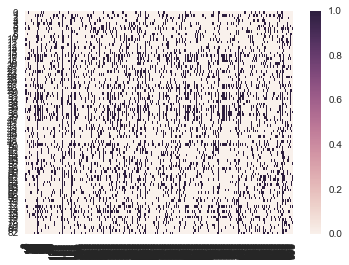

In [12]:
sns.heatmap(X.toarray());

In [13]:
vectorizer.get_feature_names()

[u'000',
 u'10',
 u'100',
 u'12',
 u'15',
 u'20',
 u'2012',
 u'2015',
 u'2015 photo',
 u'2016',
 u'25',
 u'30',
 u'50',
 u'500',
 u'ability',
 u'able',
 u'access',
 u'access exclusive',
 u'according',
 u'account',
 u'accounts',
 u'accuracy',
 u'accuracy timeliness',
 u'act',
 u'action',
 u'activities',
 u'actual',
 u'actually',
 u'ad',
 u'add',
 u'adding',
 u'addition',
 u'additional',
 u'address',
 u'adds',
 u'advantage',
 u'advertising',
 u'advice',
 u'advice statement',
 u'advice views',
 u'affect',
 u'affiliates',
 u'affiliates subsidiaries',
 u'agency',
 u'ago',
 u'alignment',
 u'alignment center',
 u'allow',
 u'allows',
 u'amazon',
 u'american',
 u'american express',
 u'answer',
 u'answers',
 u'apply',
 u'approach',
 u'approach specific',
 u'appropriateness',
 u'appropriateness financial',
 u'area',
 u'areas',
 u'arent',
 u'article',
 u'article generalized',
 u'article originally',
 u'article substitute',
 u'articles',
 u'articles open',
 u'ask',
 u'asked',
 u'asking',
 u'assista

In [43]:
tokens = tokenized.sum().sort_values(ascending=False)
tokens = pd.DataFrame(tokens)
tokens.head()

,0
time,76
business,75
help,73
center,73
alignment,72


TypeError: object of type 'NoneType' has no len()

In [33]:
# # Random Forest 
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators = 20)

# X = vectorizer.transform(content).toarray()
# print len(X)
# print X
# y = df['article_subtopic']
# print len(y)
# print y

# from sklearn import datasets, neighbors, metrics
# from sklearn.cross_validation import cross_val_score

# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
# print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))